In [20]:
import numpy as np
from matplotlib import pyplot as plt
import random

# Random Walk

A random walk is an example of a **stochastic process**, an equation that depends on random variables:

$$X_t = X_{t-1} + W_t,$$

Your random variable at time $t$ is dependent on your previous position at $t-1$ and a random term $W_t$. 

Where $$W_t = \mu + \sigma Z_t, \quad Z_t\sim\mathcal{N}(0, 1).$$ and $\mu$ is the expected return (drift term) and $\sigma$ is the standard deviation. 

Stock prices move very much like **Geometric Brownian Motion**: 

$$\Delta S_k =  \mu S_k\Delta t + \sigma S_k \Delta Z_k = S_k \left(\mu \Delta t + \sigma \Delta Z_k\right).$$

$$S_{k+1} =  S_k + S_k \left(\mu \Delta t + \sigma \Delta Z_k\right).$$

Try solving this with calculus.

Now let's simulate a random walk for $T = 252$ days with an initial price of $\$10$, $\mu$ of $25$ percent per year, and $\sigma = 0.2$ (20 percent volatility).

Text(0, 0.5, 'Price')

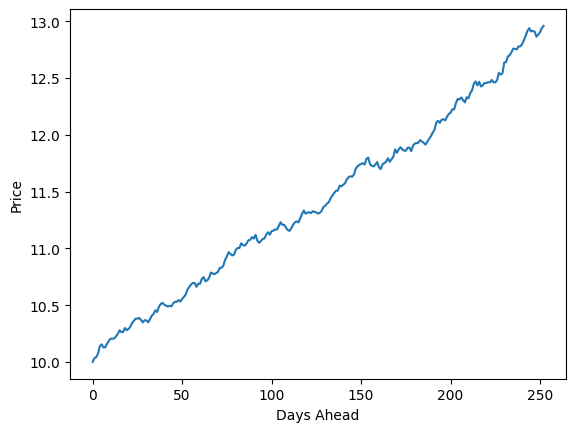

In [5]:
T = 252
S0 = 10
mu = .25/T
sigma = .002

S_pos = [S0]

# Volatility is assumed constant. Is this good or bad?
# When is this a good model? When is it bad?
Z = np.random.normal(0,1, size = T) #random.normal takes mean and standard deviation, NOT variance!

for t in range(0, T):
    S_pos.append(S_pos[t] + S_pos[t]*(mu + sigma*Z[t]))
    
plt.plot(S_pos)
plt.xlabel('Days Ahead') # Steps
plt.ylabel('Price')

Play around with $\mu$ and $\sigma$ and see what happens.

## 2D Random Walk Example

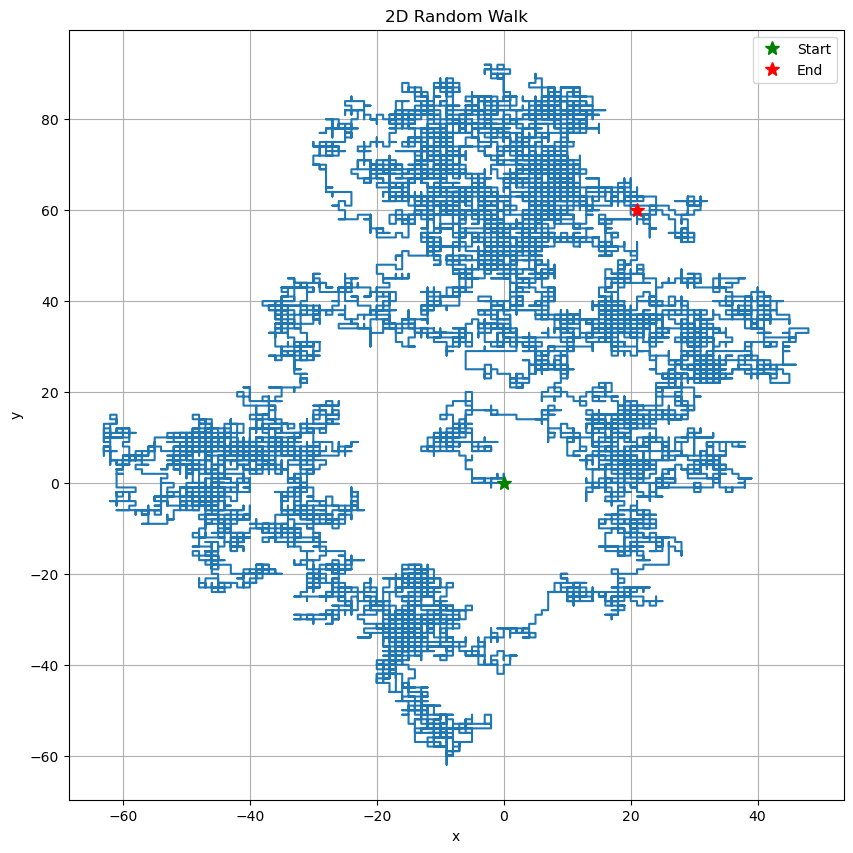

In [3]:
import random

steps = 20000     

x = np.zeros(steps)
y = np.zeros(steps)
for i in range(1, steps):
    (dx, dy) = random.choice([(1,0),(-1,0),(0,1),(0,-1)])
    x[i] = x[i-1] + dx 
    y[i] = y[i-1] + dy
        
plt.figure(figsize = (10,10))
plt.grid()
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Random Walk")

plt.plot(0,0, 'g*', markersize=10, label='Start')
plt.plot(x[-1],y[-1], 'r*', markersize=10, label='End')
plt.legend()

# Try these problems out:

1a. Using Monte Carlo Simulations, simulate 1,000 1D random walks with 200 steps each. Assume that at each iterations there is an equal probability of going left or right.

1b. Plot a histogram to check the distribution of the ending points. One way to do it is to use np.random.choice, and to get the last element of a list, do `list_1[-1]`.

0.017


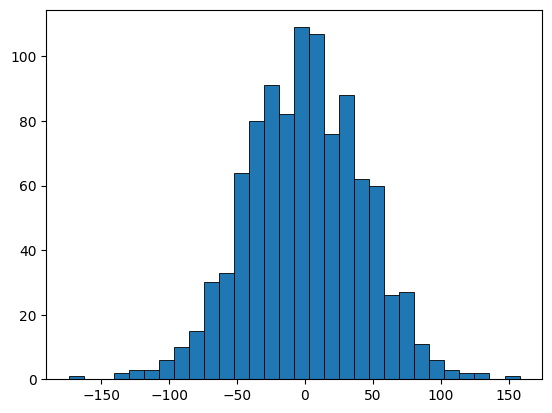

In [27]:

x = []
s = [-1,1]
for _ in range(1000):
  start = 0
  for _ in range(2000):
    
    choice = np.random.choice(s)
    start+=choice
  x.append(start)

plt.hist(x, bins=30,edgecolor='black', linewidth=0.6)

cnt = x.count(0)
print(cnt/1000)



2. Try simulating 2D random walks. What is an approximation to P(return to origin)? Use Monte Carlo methods.

In [26]:

steps = 100   
endings = []

for _ in range(10000):
  x = np.zeros(steps)
  y = np.zeros(steps)
  for i in range(0, steps):
      (dx, dy) = random.choice([(1,0),(0,1),(0,-1),(-1,0)])
      x[i] = x[i-1] + dx 
      y[i] = y[i-1] + dy
  endings.append((x[-1],y[-1]))
        

count = 0
for i in endings:
  if i[0] == 0.0 and i[1] == 0.0:
    count+=1 #Misunderstanding::: probability of returing to the originin is not 1; prob of crossing the origin is 1 as n approahces infinity steps.

print(count/10000)


0.0068


### Now back to finance, doing something similar.

In finance, the log of the stock price $\log(S_t)$ is a "random walk":

$$\log(S_t) = \log(S_{t-1}) + W_t$$ 

Ignore the logs for now, we will focus on geometric brownian motion: 
$\Delta S_k =  \mu S_k\Delta t + \sigma S_k \Delta Z_k = S_k \left(\mu \Delta t + \sigma \Delta Z_k\right).$


3. Create 5,000 random walkers with the same initial conditions. You get to pick the initial parameters (starting price, volatility, etc.). Plot a histogram to check the distribution of their ending points, you can normalize if you want.

[12.7162659726273, 12.769145593984888, 13.00434642150561, 13.097966964915699, 12.272747428204603, 12.580905511170005, 13.135530490026676, 13.11907266637527, 13.103611730016906, 13.484738724005437, 12.58247262524996, 12.252560056728367, 12.800878514370007, 12.499049631778233, 13.092231997094567, 12.278504517070933, 12.609190522236966, 13.17600703835323, 12.573703998119042, 13.419872443647437, 11.927865848138696, 12.340743408048077, 12.94751411487902, 13.54675366360119, 12.811457825873335, 13.200472938740692, 12.488396834980607, 12.684018472634813, 12.642059203329802, 12.12319238303622, 12.039579265249543, 12.211891724163666, 12.976659308824413, 12.910512071596257, 13.707498073297305, 12.737228128659266, 13.02205987638941, 12.83278866719377, 13.056294501655199, 13.061806856254465, 12.04767918844075, 12.116834715766025, 12.720278990482749, 12.60657771449806, 13.061112686056418, 12.862964770582831, 13.223790845987509, 12.720023811971043, 12.322404857532412, 13.083342367167484, 12.575190314

Text(0, 0.5, 'Price')

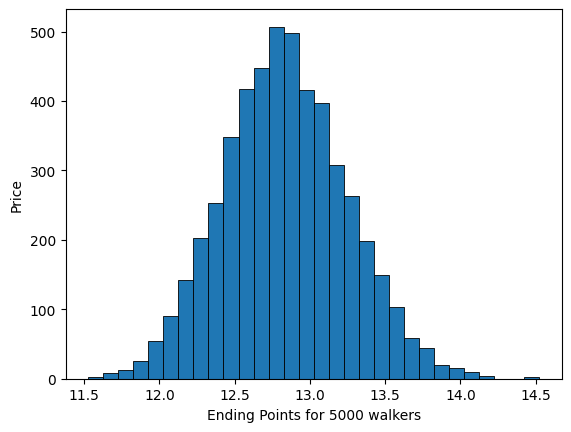

In [32]:


T = 252
S0 = 10
mu = .25/T
sigma = .002

S_pos = [S0]
vals = []
# Volatility is assumed constant. Is this good or bad?
# When is this a good model? When is it bad?
 #random.normal takes mean and standard deviation, NOT variance!
for _ in range (5000):
  S_pos = [S0]
  Z = np.random.normal(0,1, size = T)
  for t in range(0, T):
      
      S_pos.append(S_pos[t] + S_pos[t]*(mu + sigma*Z[t]))
  vals.append(S_pos[-1])

print(vals)
    
plt.hist(vals, bins=30,edgecolor='black', linewidth=0.6)
plt.xlabel('Ending Points for 5000 walkers') # Steps
plt.ylabel('Price')


  

4. Try again with log prices.